[*********************100%***********************]  1 of 1 completed
Total Return: 0.6043655372135424
Strategy Return: 0.48109113688995464
Profit: 16.275314041891345


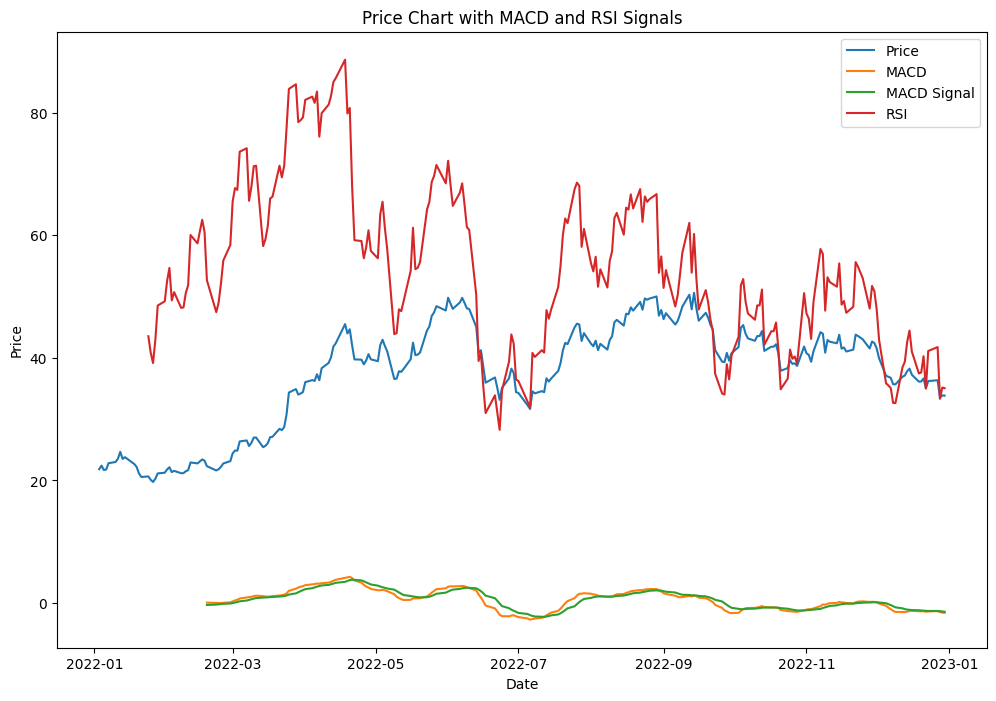

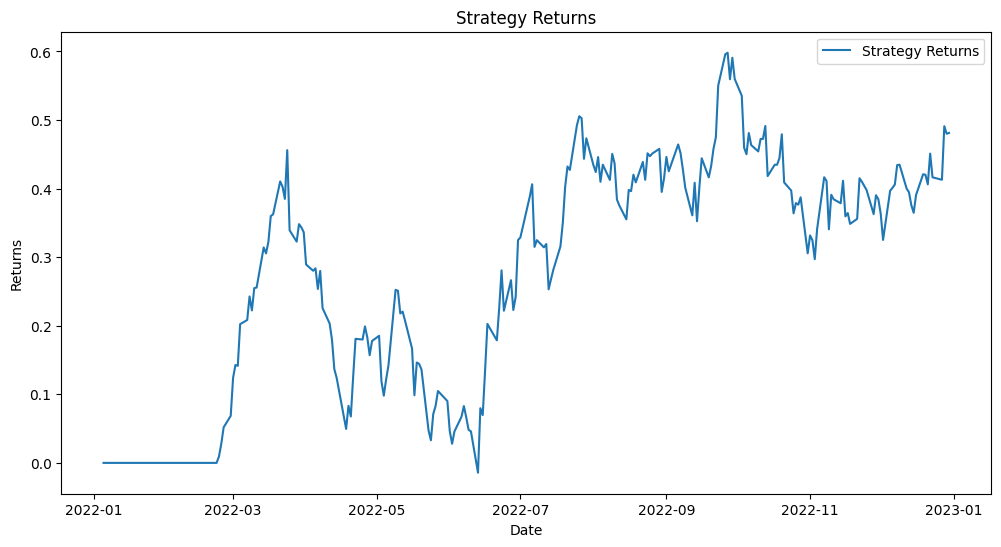

In [2]:
# MACD and RSI Combined Trading Strategy
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
import yfinance as yf

# Download historical data from Yahoo Finance
symbol = "EQT"
start_date = "2022-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate MACD indicator
macd, macd_signal, _ = talib.MACD(data["Close"])

# Calculate RSI indicator
rsi = talib.RSI(data["Close"])

# Create a DataFrame to store the signals
signals = pd.DataFrame(index=data.index)
signals["Price"] = data["Close"]
signals["MACD"] = macd
signals["MACD_Signal"] = macd_signal
signals["RSI"] = rsi

# Define the strategy
def generate_signals(signals):
    signals["Position"] = 0
    signals.loc[signals["MACD"] > signals["MACD_Signal"], "Position"] = 1
    signals.loc[signals["MACD"] < signals["MACD_Signal"], "Position"] = -1
    signals.loc[signals["RSI"] > 70, "Position"] = -1  # Overbought condition
    signals.loc[signals["RSI"] < 30, "Position"] = 1  # Oversold condition
    signals["Position"] = signals["Position"].shift()

generate_signals(signals)

# Calculate daily returns
signals["Return"] = signals["Price"].pct_change()
signals["Strategy_Return"] = signals["Position"].shift() * signals["Return"]

# Calculate performance metrics
total_return = signals["Return"].cumsum().iloc[-1]
strategy_return = signals["Strategy_Return"].cumsum().iloc[-1]
profit = strategy_return * signals["Price"].iloc[-1]

# Print performance metrics
print("Total Return:", total_return)
print("Strategy Return:", strategy_return)
print("Profit:", profit)

# Price chart with MACD and RSI signals
plt.figure(figsize=(12, 8))
plt.plot(data.index, data["Close"], label="Price")
plt.plot(data.index, signals["MACD"], label="MACD")
plt.plot(data.index, signals["MACD_Signal"], label="MACD Signal")
plt.plot(data.index, signals["RSI"], label="RSI")
plt.legend()
plt.title("Price Chart with MACD and RSI Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

# Strategy returns chart
plt.figure(figsize=(12, 6))
plt.plot(data.index, signals["Strategy_Return"].cumsum(), label="Strategy Returns")
plt.legend()
plt.title("Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()